In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
item_based_recs = pd.read_csv('data/item-based-recs.csv')
content_based_recs = pd.read_csv('data/content-based-recs.csv')

Text(0.5, 1.0, 'Item-Based Score')

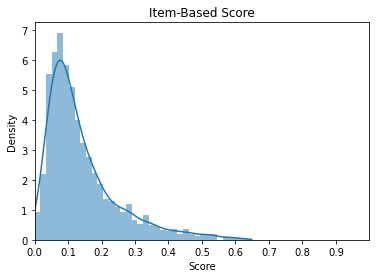

In [3]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_xticks(np.arange(0, 1, 0.1))

sns.histplot(item_based_recs['Score'], kde=True, stat="density", linewidth=0).set_title('Item-Based Score')

Text(0.5, 1.0, 'Content-Based Score')

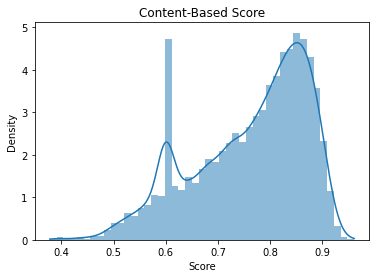

In [4]:
sns.histplot(content_based_recs['Score'], kde=True, stat="density", linewidth=0).set_title('Content-Based Score')

In [5]:
from scipy.stats import boxcox

# Box-Cox Transformation for skewness
item_based_recs.insert(0, 'boxcox', boxcox(item_based_recs['Score']+1)[0]) # add 1 since boxcox doesn't take values <= 0
content_based_recs.insert(0, 'boxcox', boxcox(content_based_recs['Score']+1)[0])

In [6]:
# Normalize to get values between 0 and 1
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

item_based_recs['boxcox'] = normalize(item_based_recs['boxcox'])
content_based_recs['boxcox'] = normalize(content_based_recs['boxcox'])

Text(0.5, 1.0, 'Transformed Item-Based Score')

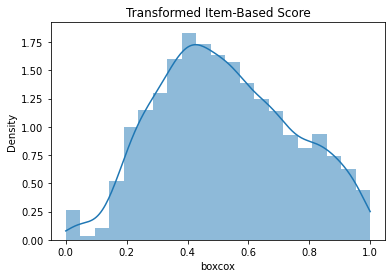

In [7]:
sns.histplot(item_based_recs['boxcox'], kde=True, stat="density", linewidth=0).set_title('Transformed Item-Based Score')

Text(0.5, 1.0, 'Transformed Content-Based Score')

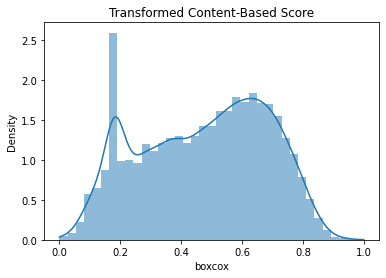

In [8]:
sns.histplot(content_based_recs['boxcox'], kde=True, stat="density", linewidth=0).set_title('Transformed Content-Based Score')

In [9]:
# Merge scores into one df
df = pd.merge(content_based_recs, item_based_recs, on='Name')

# Move Item-Based Score to the front
score_y = df.pop('boxcox_y')
df.insert(0, 'Item-Based Score', score_y)

# Rename Content-Based Score column
df = df.rename(columns={'boxcox_x': 'Content-Based Score'})

# Insert column for combined score and sort by it
df.insert(0, 'Combined Score', df['Content-Based Score'] + df['Item-Based Score'])
df = df.sort_values('Combined Score', ascending=False)
df.reset_index(drop=True, inplace=True)

In [10]:
df.head(10)

,Combined Score,Item-Based Score,Content-Based Score,Score_x,MAL_ID,Name,Average Rating,Genres,English name,Japanese name,Type,Episodes,Premiered,Studios,Members,Favorites,Score_y
0,1.897387,0.965481,0.931906,0.942173,13759,Sakura-sou no Pet na Kanojo,8.19,"Slice of Life, Comedy, Drama, Romance, School",The Pet Girl of Sakurasou,さくら荘のペットな彼女,TV,24,Fall 2012,J.C.Staff,920871,25403,0.499171
1,1.814439,1.000000,0.814439,0.907187,32281,Kimi no Na wa.,8.96,"Romance, Supernatural, School, Drama",Your Name.,君の名は。,Movie,1,Unknown,CoMix Wave Films,1726660,71054,0.648607
2,1.804732,0.984915,0.819817,0.908869,9989,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada...,8.42,"Slice of Life, Supernatural, Drama",anohana:The Flower We Saw That Day,あの日見た花の名前を僕達はまだ知らない。,TV,11,Spring 2011,A-1 Pictures,1157747,30271,0.570066
3,1.801762,0.915935,0.885826,0.928869,36098,Kimi no Suizou wo Tabetai,8.59,Drama,I want to eat your pancreas,君の膵臓をたべたい,Movie,1,Unknown,Studio VOLN,437815,10435,0.386521
4,1.800654,0.968326,0.832328,0.912750,28223,Death Parade,8.2,"Game, Mystery, Psychological, Drama, Thriller",Death Parade,デス・パレード,TV,12,Winter 2015,Madhouse,1213828,22364,0.508127
5,1.800302,0.951476,0.848826,0.917802,16782,Kotonoha no Niwa,8.05,"Slice of Life, Psychological, Drama, Romance",The Garden of Words,言の葉の庭,Movie,1,Unknown,CoMix Wave Films,574997,5579,0.460153
6,1.799500,0.941113,0.858387,0.920696,21995,Ao Haru Ride,7.67,"Comedy, Drama, Romance, School, Shoujo, Slice ...",Blue Spring Ride,アオハライド,TV,12,Summer 2014,Production I.G,591908,7415,0.435593
7,1.798605,0.992534,0.806071,0.904553,31043,Boku dake ga Inai Machi,8.37,"Mystery, Psychological, Supernatural, Seinen",ERASED,僕だけがいない街,TV,12,Winter 2016,A-1 Pictures,1359119,37017,0.606155
8,1.797826,0.940495,0.857331,0.920378,2167,Clannad,8.07,"Comedy, Drama, Romance, School, Slice of Life,...",Clannad,CLANNAD,TV,23,Fall 2007,Kyoto Animation,1095634,27283,0.434222
9,1.794451,0.966667,0.827784,0.911346,18897,Nisekoi,7.65,"Harem, Comedy, Romance, School, Shounen",Nisekoi:False Love,ニセコイ,TV,20,Winter 2014,Shaft,857824,12713,0.502856
